In [6]:
import numpy as np
import pandas as pd
import warnings

In [7]:
warnings.filterwarnings('ignore')

# Loading dataset

In [8]:
# naming the columns for the data being loaded

column_names = ["user_id", "item_id", "rating", "timestamp"]

In [9]:
data = pd.read_csv("Dataset/u.data", sep = "\t", names=column_names)

In [10]:
data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [11]:
data.shape

(100000, 4)

In [12]:
# reading the first two columns from item file, containig item_id and name of file

items = pd.read_csv("Dataset/u.item", sep = "\|", usecols=[0,1], names = ["item_id", "title"])

In [13]:
items.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [14]:
items.shape

(1682, 2)

In [15]:
# merging both the files on item_id

df = pd.merge(data, items, on = "item_id")

In [16]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [17]:
df.shape

(100000, 5)

# Exploratory analysis

In [18]:
import seaborn as sns

In [19]:
# number of reviews for each movie in descending order

df.groupby("title").count()["rating"].sort_values(ascending = False)

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
� k�ldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [20]:
# Average review for each movie in descending order

df.groupby("title").mean()["rating"].sort_values(ascending = False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de d�cembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [21]:
# creating a dataframe with no of rating and average rating for each movie

ratings = pd.DataFrame(df.groupby("title").mean()["rating"])

In [22]:
ratings["total"] = pd.DataFrame(df.groupby("title").count()["rating"])

In [23]:
ratings

,rating,total
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


Movies with less numbers of reviews are more likely to be biased as rating will be based on few people<br>
Discard all the  movie which have less no. of reviews 

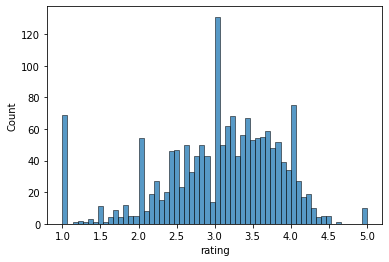

In [24]:
# plotting a histogram of number of reviews
sns.histplot(ratings["rating"], bins = 60)

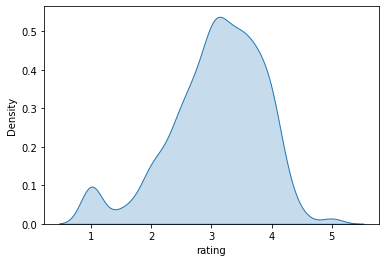

In [25]:
sns.kdeplot(ratings["rating"], shade = True)

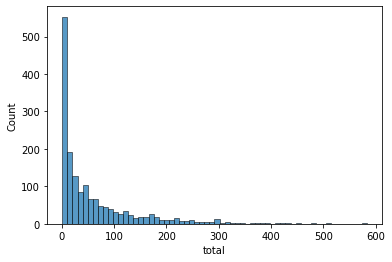

In [26]:
sns.histplot(ratings["total"], bins = 60, kde = False)

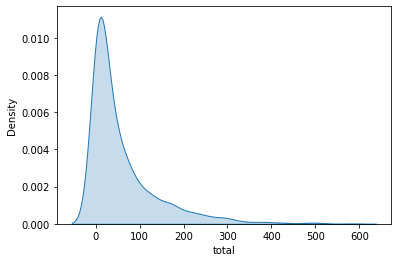

In [27]:
sns.kdeplot(ratings["total"], shade = True)

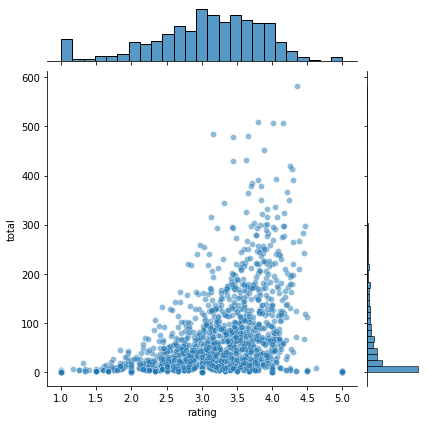

In [28]:
sns.jointplot(x = "rating", y = "total", data = ratings, alpha = .5)

As number of reviews increases, avg rating also increases

# Item based recommendation

Creating a matrix, where each row is a user and each column is a movie<br>Each cell reperesents rating given by  user to a movie

In [29]:
mat = df.pivot_table(index="user_id", columns="title", values="rating")

In [30]:
mat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),...,"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

We can correalate each movie user ratings to all the movies to get correaltion of a movie with all the other movies

In [31]:
ratings.loc["Contact (1997)"]

rating      3.803536
total     509.000000
Name: Contact (1997), dtype: float64

In [32]:
contact_user_ratings = mat["Contact (1997)"]
contact_user_ratings.head()

user_id
1    5.0
2    3.0
3    2.0
4    5.0
5    NaN
Name: Contact (1997), dtype: float64

In [33]:
similar_to_contact = mat.corrwith(contact_user_ratings)
similar_to_contact

title
'Til There Was You (1997)                0.904534
1-900 (1994)                                  NaN
101 Dalmatians (1996)                   -0.108441
12 Angry Men (1957)                      0.022265
187 (1997)                               0.135512
                                           ...   
Young Guns II (1990)                     0.326304
Young Poisoner's Handbook, The (1995)   -0.006864
Zeus and Roxanne (1997)                 -0.866025
unknown                                  0.243975
� k�ldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [34]:
corr_contact = pd.DataFrame(similar_to_contact, columns = ["Correlation"])

In [35]:
corr_contact.dropna(inplace = True)

In [36]:
corr_contact

,Correlation
title,
'Til There Was You (1997),0.904534
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512
2 Days in the Valley (1996),0.248031
...,...
Young Guns (1988),0.388839
Young Guns II (1990),0.326304
"Young Poisoner's Handbook, The (1995)",-0.006864


In [37]:
corr_contact.sort_values("Correlation", ascending = False)

,Correlation
title,
Lamerica (1994),1.0
Faust (1994),1.0
"Wedding Gift, The (1994)",1.0
"Visitors, The (Visiteurs, Les) (1993)",1.0
King of the Hill (1993),1.0
...,...
Dingo (1992),-1.0
Romper Stomper (1992),-1.0
Hearts and Minds (1996),-1.0


We need to threshold Movie as movies with less number of reviews as likely to be biased

In [38]:

corr_contact = corr_contact.join(ratings["total"])

In [39]:
top5_recommend = corr_contact[corr_contact["total"] >100].sort_values("Correlation", ascending = False)[1:6]

In [40]:
top5_recommend

,Correlation,total
title,,
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136
Sneakers (1992),0.377275,150


In [41]:
type(top5_recommend)

pandas.core.frame.DataFrame

# predict func


In [44]:
def predict(movie):
    similar_to_movie = mat.corrwith(mat[movie])
    corr_movie = pd.DataFrame(similar_to_movie, columns=["correlation"])
    corr_movie.dropna(inplace = True)
    corr_movie = corr_movie.join(ratings["total"])
    top5 = corr_movie[corr_movie["total"] > 100].sort_values("correlation", ascending = False)[1:6] 
    top5.columns = ["vote_per", "total_votes"]
    top5.vote_per = top5.vote_per*100
    print(top5)



In [45]:
try:
    movie = input("Enter movie name: ")
    predict(movie)
except:
    print("Check movie name")

Enter movie name: Contact (1997)
                      vote_per  total_votes
title                                      
Philadelphia (1993)  44.650948          137
Mask, The (1994)     41.832776          129
Young Guns (1988)    38.883908          101
Sling Blade (1996)   38.484008          136
Sneakers (1992)      37.727462          150
